In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Activation, Dense, Lambda,Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


Using TensorFlow backend.


In [6]:
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_dir = 'dataset/train/'
validation_dir = 'dataset/test/'
test_dir = 'dataset/test/'


In [4]:
image_w = 100
image_h = 100

In [7]:
train_generator = datagen.flow_from_directory(train_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 2062 images belonging to 10 classes.


In [8]:
validation_generator = datagen.flow_from_directory(test_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 108 images belonging to 10 classes.


In [9]:
test_generator = datagen.flow_from_directory(test_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 108 images belonging to 10 classes.


In [10]:
# def LeNet(width, height, channels, output):
#     model = Sequential()
#     model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), input_shape=(width, height, channels)))
    
# #     model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), input_shape=(width, height, channels))

#     model.add(Activation('relu'))
    
#     model.add(MaxPool2D(pool_size=(2,2)))
    
#     model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(2,2)))
    
#     model.add(Activation('relu'))
    
#     model.add(MaxPool2D(pool_size=(2,2)))
    
#     model.add(Flatten())
    
#     model.add(Dense(100))
    
#     model.add(Activation('relu'))
    
#     model.add(Dense(output))
#     model.add(Activation('softmax'))
    
#     return model

In [46]:
#Our Model
def LeNet(width, height, channels, output):
    model = Sequential()
    
    #Convulation
    model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), input_shape=(width, height, channels)))
    
    #ReLU Activation
    model.add(Activation('relu'))
    
    #Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    #Convolution
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(2,2)))
    
    #ReLU Activation
    model.add(Activation('relu'))
    
    #Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    #Hidden Layer
    model.add(Dense(100))
    
    model.add(Activation('relu'))
    
    #Hidden Layer
    model.add(Dense(50))
    
    #adding dropout
    
    model.add(Dropout(0.2))
    
    model.add(Activation('relu'))
    
    model.add(Dense(output))
    
    model.add(Activation('softmax'))
    
    return model
    
    #We can also add dropout

In [47]:
train_generator.samples

2062

In [48]:
EPOCHS = 20
train_sample = train_generator.samples
validation_sample = validation_generator.samples
test_sample = test_generator.samples

In [49]:
model = LeNet(image_w, image_h, 3, 10)

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 49, 49, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 49, 49, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
__________

In [51]:
batch_size = train_generator.batch_size

In [52]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['accuracy'])

In [53]:
history = model.fit_generator(train_generator,
                   steps_per_epoch = train_sample//batch_size,
                   epochs = EPOCHS,
                   validation_data = validation_generator,
                   validation_steps = validation_sample//batch_size)

Epoch 1/20
64/64 [==============================] - 10s 152ms/step - loss: 0.0899 - acc: 0.1123 - val_loss: 0.0890 - val_acc: 0.1667
Epoch 2/20
64/64 [==============================] - 10s 160ms/step - loss: 0.0762 - acc: 0.3766 - val_loss: 0.0688 - val_acc: 0.4079
Epoch 3/20
64/64 [==============================] - 9s 143ms/step - loss: 0.0525 - acc: 0.5967 - val_loss: 0.0421 - val_acc: 0.7105
Epoch 4/20
64/64 [==============================] - 9s 143ms/step - loss: 0.0385 - acc: 0.7233 - val_loss: 0.0386 - val_acc: 0.7105
Epoch 5/20
64/64 [==============================] - 10s 154ms/step - loss: 0.0307 - acc: 0.7928 - val_loss: 0.0280 - val_acc: 0.7917
Epoch 6/20
64/64 [==============================] - 10s 161ms/step - loss: 0.0237 - acc: 0.8397 - val_loss: 0.0208 - val_acc: 0.8421
Epoch 7/20
64/64 [==============================] - 10s 163ms/step - loss: 0.0215 - acc: 0.8569 - val_loss: 0.0201 - val_acc: 0.8816
Epoch 8/20
64/64 [==============================] - 10s 154ms/step - lo

In [54]:
ls

camera notebook.ipynb  haarcascade_frontalface_alt.xml  model.h5
camera.py              haarcascade.ipynb                modelimages.h5
cnn_utils.py           hand_haarcascade.xml             recognize_image.ipynb
cnn_utils.pyc          images/                          tensorflow_model.ipynb
data/                  KerasImages.ipynb                voice.py
dataset/               keras_model.ipynb
haarcascade_eye.xml    model/


In [55]:
model.save_weights('modelimages.h5')

In [56]:
ls

camera notebook.ipynb  haarcascade_frontalface_alt.xml  model.h5
camera.py              haarcascade.ipynb                modelimages.h5
cnn_utils.py           hand_haarcascade.xml             recognize_image.ipynb
cnn_utils.pyc          images/                          tensorflow_model.ipynb
data/                  KerasImages.ipynb                voice.py
dataset/               keras_model.ipynb
haarcascade_eye.xml    model/


In [57]:
model.load_weights('modelimages.h5')

In [58]:
%matplotlib inline

In [66]:
# img = load_img('dataset/training_set/dogs/dog.1.jpg', target_size=(image_w, image_h))
img = load_img('images/9.jpg', target_size=(image_w, image_h))

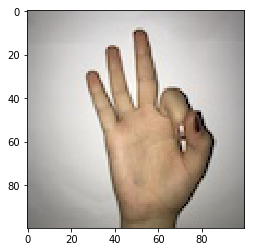

In [67]:
plt.imshow(img)

In [68]:
img = np.array(img)/255

img.shape

(100, 100, 3)

In [69]:
img = np.expand_dims(img, axis = 0)

In [70]:
img.shape

(1, 100, 100, 3)

In [75]:
predict_array = model.predict(img)

print  predict_array

result = [np.argmax(x) for x in predict_array]

print("the image is predicted to be ",np.argmax(result))



[[ 0.2483459   0.00488416  0.00393717  0.00417358  0.21125931  0.02831598
   0.12092137  0.09308165  0.15057015  0.13451071]]
('the image is predicted to be ', 0)


In [74]:
cat = {0, 1}
dog = {1, 0}